In [ ]:
# basic classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# evaluation metrics and model selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# some helper libraries
import numpy as np
from sklearn.base import clone as clone_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



'\nfor use local dataset :\n  1) you need upload your dataset in Gdrive \n  2) use below address to access the dataset\n    /gdrive/My\\ Drive/{location you want to move}\n  \n  3) import your dataset :) \n\n'

## Define the Models

In [ ]:
# create a list of classifiers
models = []

models.append((
    'K-Nearest Neighbors',
      KNeighborsClassifier(n_neighbors=5)
))

"""models.append((
    'Radius Neighbors',
      RadiusNeighborsClassifier(radius=3.0)
))"""

models.append((
    'Multi-Layer Perceptron',
      MLPClassifier(hidden_layer_sizes=(3, 3), solver='lbfgs', alpha=1e-5,max_iter=10000,
                    random_state=0)
))

models.append((
  'Logistic Regression',
  LogisticRegression(max_iter=10000)
))

models.append((
    'Naive Bayes',
    GaussianNB()
))

models.append((
    'Linear SVM',
      SVC(kernel='linear', gamma='auto')
))

models.append((
    'Decision Tree',
    DecisionTreeClassifier()
))

models.append((
    'Random Forest',
    RandomForestClassifier()
))



# define an ensemble of all models 
ensemble_estimators = [(model[0], clone_model(model[1])) for model in models]
ensemble_model = VotingClassifier(estimators=ensemble_estimators)
models.append((
    'Ensemble of All Models',
     ensemble_model
))

print('{} models have been defined.'.format(len(models)))

8 models have been defined.


# Import our repaired database

If runing on google colab

In [ ]:
from google.colab import files
import os
uploaded = files.upload()
cars = pd.read_csv('cars.csv')
cars.head(5)

If runing on your local device

In [ ]:
import os
cars = pd.read_csv(r'F:\AUIDEO\BOOKS\datamaning\project\cars.csv')
cars.head(5)

,A,B,C,D,kind
0,129,0,202,73,suv
1,86,61,189,189,suv
2,129,21,210,116,suv
3,145,1,212,66,sedan
4,108,73,201,183,sedan


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10053 entries, 0 to 10052
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       10053 non-null  int64 
 1   B       10053 non-null  int64 
 2   C       10053 non-null  int64 
 3   D       10053 non-null  int64 
 4   kind    10053 non-null  object
dtypes: int64(4), object(1)
memory usage: 392.8+ KB


In [ ]:
cars.describe()

,A,B,C,D
count,10053.000000,10053.000000,10053.000000,10053.000000
mean,166.495673,43.973640,312.386850,191.905103
std,56.784069,32.825304,75.405073,45.962713
min,0.000000,0.000000,78.000000,49.000000
25%,129.000000,12.000000,270.000000,168.000000
50%,167.000000,44.000000,324.000000,194.000000
75%,211.000000,70.000000,374.000000,220.000000
max,299.000000,149.000000,416.000000,312.000000


In [ ]:
cars.kind.value_counts()

sedan       5921
suv         1392
microbus     883
truck        823
bus          558
minivan      476
Name: kind, dtype: int64

<AxesSubplot:xlabel='kind', ylabel='count'>

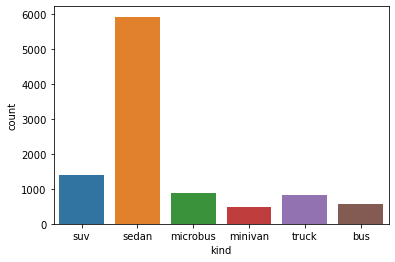

In [ ]:
sns.countplot(x='kind',data=cars)

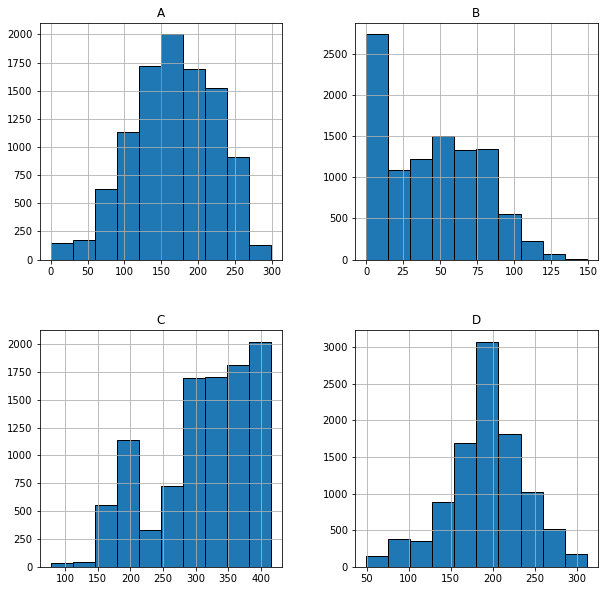

In [ ]:
cars.hist(edgecolor='black',figsize=(10,10))
plt.show()

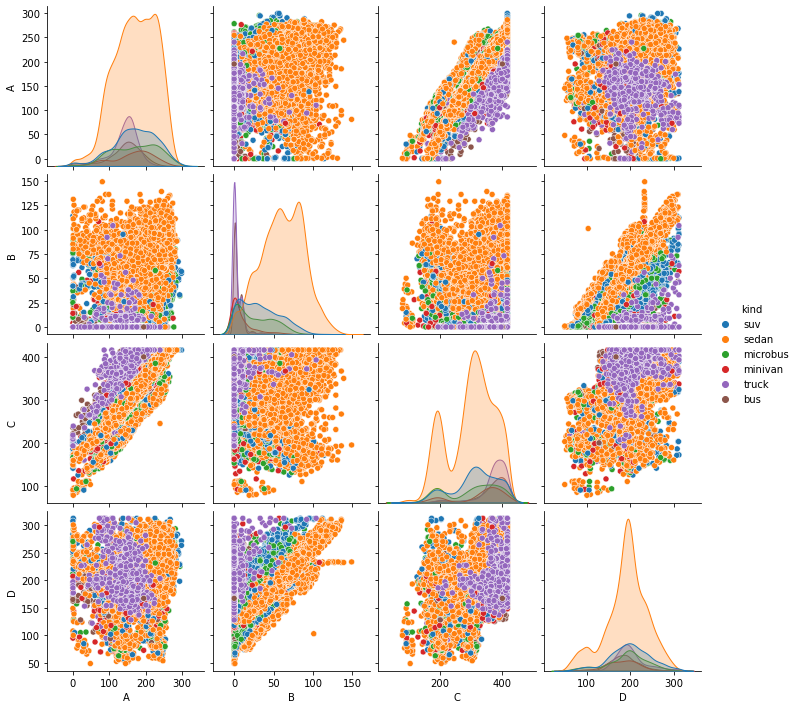

In [ ]:
sns.pairplot(cars , hue='kind');

# resize for reduce iterations

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
X_scaled = scaler.transform(x)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))
X_scaled=pd.DataFrame({'A': X_scaled[:, 0], 'B': X_scaled[:, 1],'C': X_scaled[:, 2],'D': X_scaled[:, 3]})
X_scaled

[-1.58322464e-16  0.00000000e+00  3.39262422e-16 -2.54446817e-16]
[1. 1. 1. 1.]


,A,B,C,D
0,-0.660353,-1.339693,-1.463991,-2.587119
1,-1.417645,0.518722,-1.636402,-0.063209
2,-0.660353,-0.699911,-1.357892,-1.651532
3,-0.378570,-1.309227,-1.331367,-2.739424
4,-1.030194,0.884312,-1.477253,-0.193756
...,...,...,...,...
10048,-0.713187,-1.339693,0.167280,-0.106724
10049,-1.153474,-1.339693,-0.204066,0.067338
10050,-1.047805,-1.339693,-0.164279,-0.259029
10051,-0.801245,-1.339693,0.180543,-0.128482


# split train and test datas

In [ ]:
x = cars.drop('kind', axis=1)
y= cars.kind
print(x.shape)
print(y.shape)
# split data
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10053, 4)
(10053,)
(6031, 4)
(6031,)
(4022, 4)
(4022,)


## Training and Prediction

In [ ]:
print('Training and Prediction')
print('Train size : {} - Test size : {}'.format(len(y_train), len(y_test)))
print('-'*40)
for name, model in models:
  print('Training {} ...'.format(name))
  model.fit(x_train, y_train)
print('-'*40)
print('All models have been fitted successfully.')

Training and Prediction
Train size : 6031 - Test size : 4022
----------------------------------------
Training K-Nearest Neighbors ...
Training Multi-Layer Perceptron ...
Training Logistic Regression ...
Training Naive Bayes ...
Training Linear SVM ...
Training Decision Tree ...
Training Random Forest ...
Training Ensemble of All Models ...
----------------------------------------
All models have been fitted successfully.


## Evaluating the Models
for each model we evaluate the following scores:
- Train/Test Accuracy
- Precision, Recall and f1-score for each class
- Confusion Matrix 

In [ ]:
# create a data frame to store the result
scores = pd.DataFrame()
# evaluating each model 
for name, model in models:
    print('-'*60,"\n"*2)
    print('Model : ', name)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    scores = scores.append({'model': name, 'score': 'Test Accuracy',
                            'value': test_acc}, ignore_index=True)
    scores = scores.append({'model': name, 'score': 'Train Accuracy',
                            'value': train_acc}, ignore_index=True)
    print('Train Accuracy : ', train_acc)
    print('Test Accuracy : ', test_acc)
    print('Classification Report for test data:')
    print(classification_report(y_test, y_test_pred))

------------------------------------------------------------ 


Model :  K-Nearest Neighbors
Train Accuracy :  0.8560769358315371
Test Accuracy :  0.8055693684733963
Classification Report for test data:
              precision    recall  f1-score   support

         bus       0.53      0.48      0.50       228
    microbus       0.55      0.41      0.47       359
     minivan       0.51      0.43      0.46       190
       sedan       0.94      0.98      0.96      2377
         suv       0.64      0.64      0.64       547
       truck       0.64      0.68      0.66       321

    accuracy                           0.81      4022
   macro avg       0.63      0.60      0.62      4022
weighted avg       0.79      0.81      0.80      4022

------------------------------------------------------------ 


Model :  Multi-Layer Perceptron
Train Accuracy :  0.8194329298623777
Test Accuracy :  0.8127797115862755
Classification Report for test data:
              precision    recall  f1-score   su

#    confusion matrixes

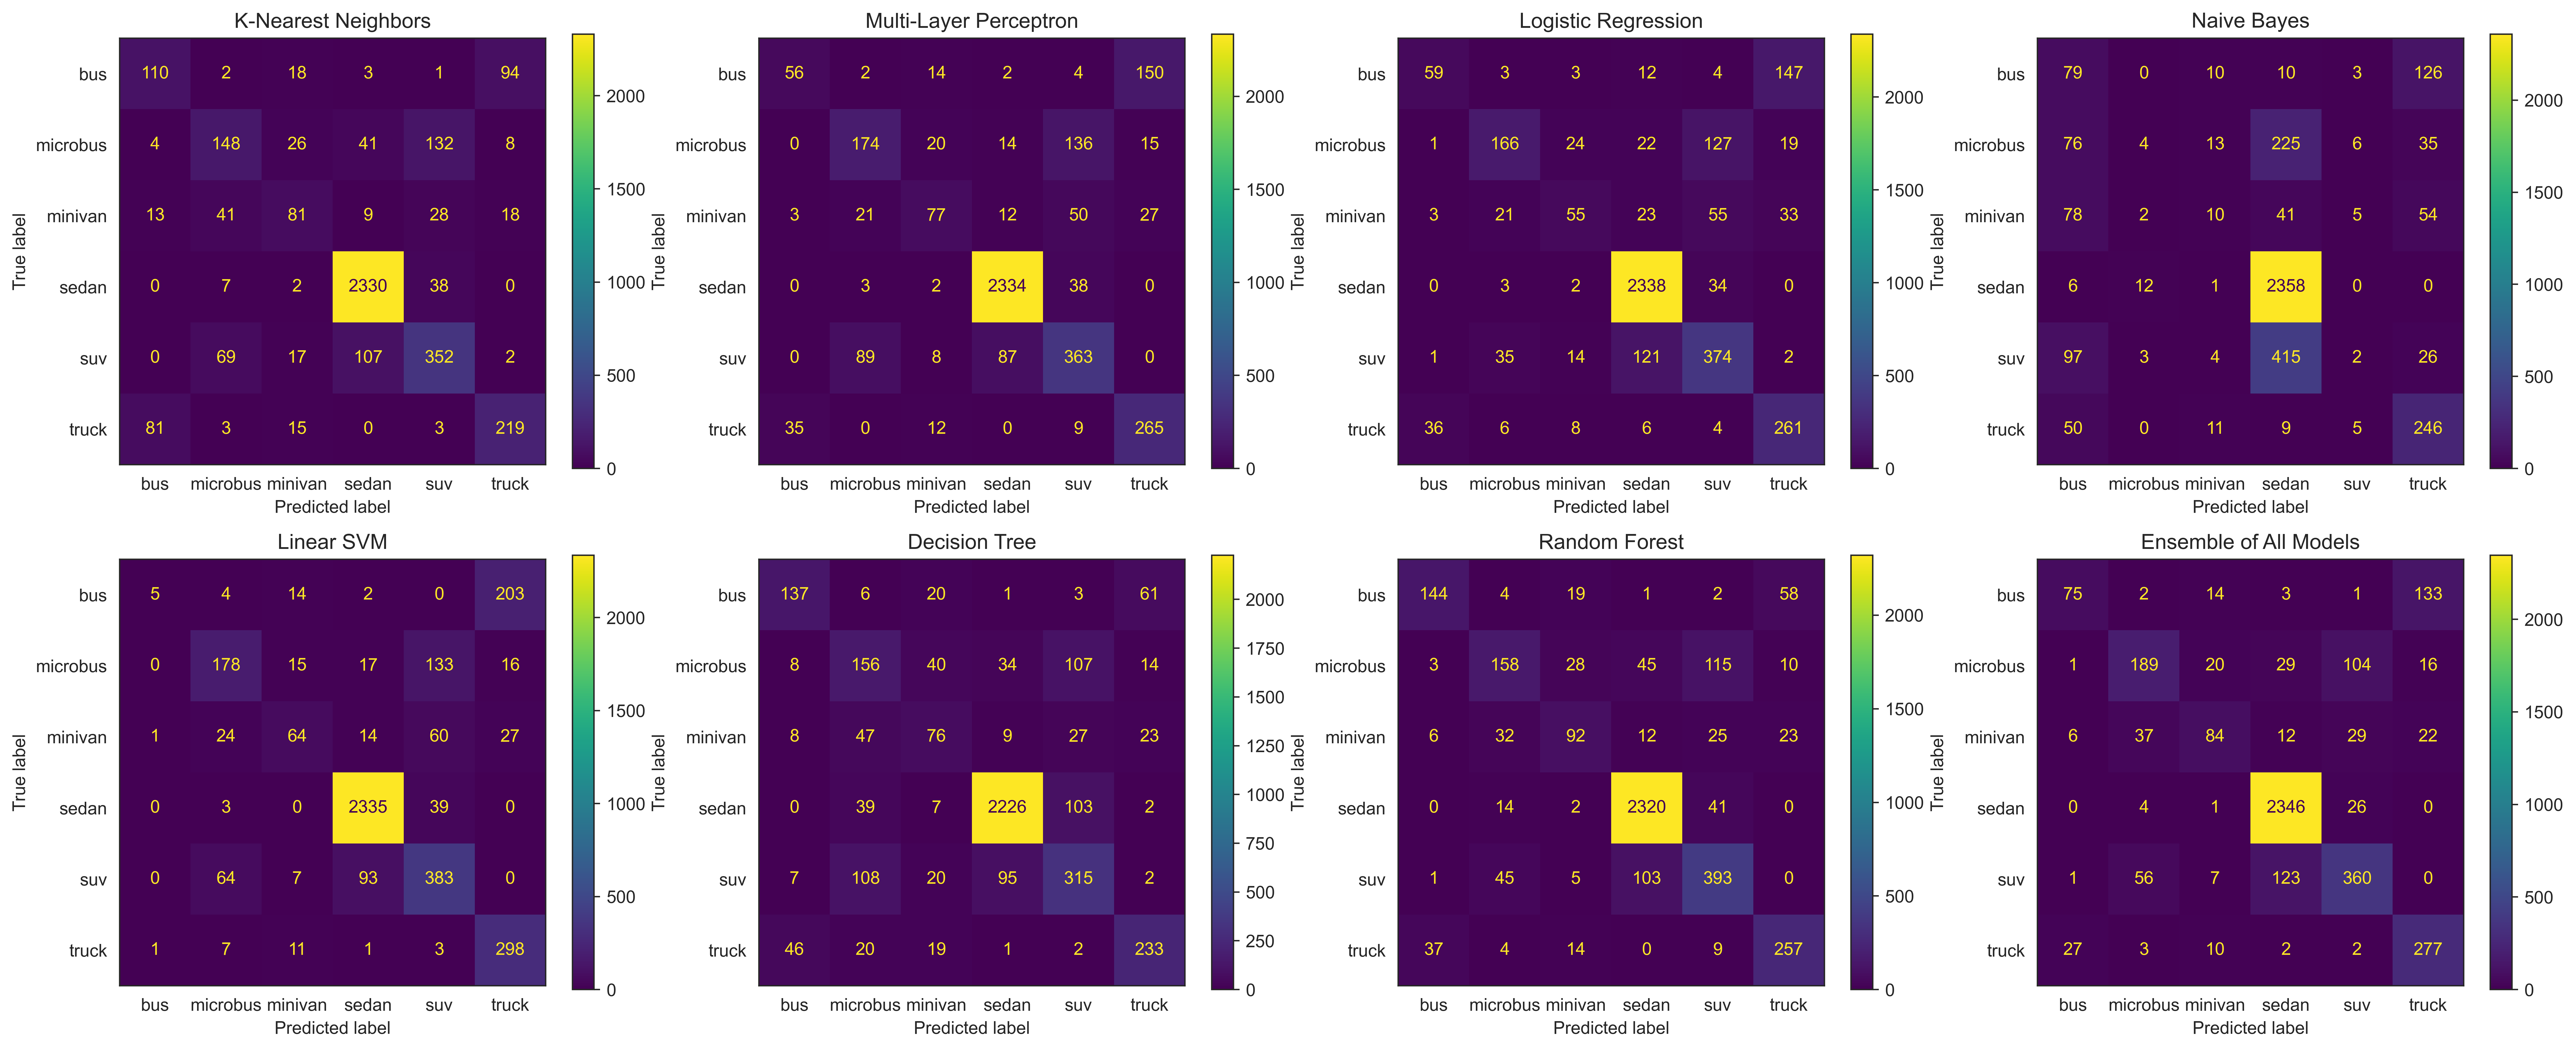

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(figsize=(25,10))
num=1
for name, model in models:
    ax=fig.add_subplot(int("24"+str(num)))
    dis=plot_confusion_matrix(model, x_test, y_test,ax=ax)  
    dis.ax_.set_title(name) 
    num+=1
fig.show()     

# Summarize the Results

In [ ]:
scores.groupby(by=['model', 'score']).sum()

value
model                  score                   
Decision Tree          Test Accuracy   0.781452
                       Train Accuracy  1.000000
Ensemble of All Models Test Accuracy   0.828195
                       Train Accuracy  0.888244
K-Nearest Neighbors    Test Accuracy   0.805569
                       Train Accuracy  0.856077
Linear SVM             Test Accuracy   0.811288
                       Train Accuracy  0.814790
Logistic Regression    Test Accuracy   0.808802
                       Train Accuracy  0.800862
Multi-Layer Perceptron Test Accuracy   0.812780
                       Train Accuracy  0.819433
Naive Bayes            Test Accuracy   0.671059
                       Train Accuracy  0.671365
Random Forest          Test Accuracy   0.836400
                       Train Accuracy  1.000000

# Plot the scores

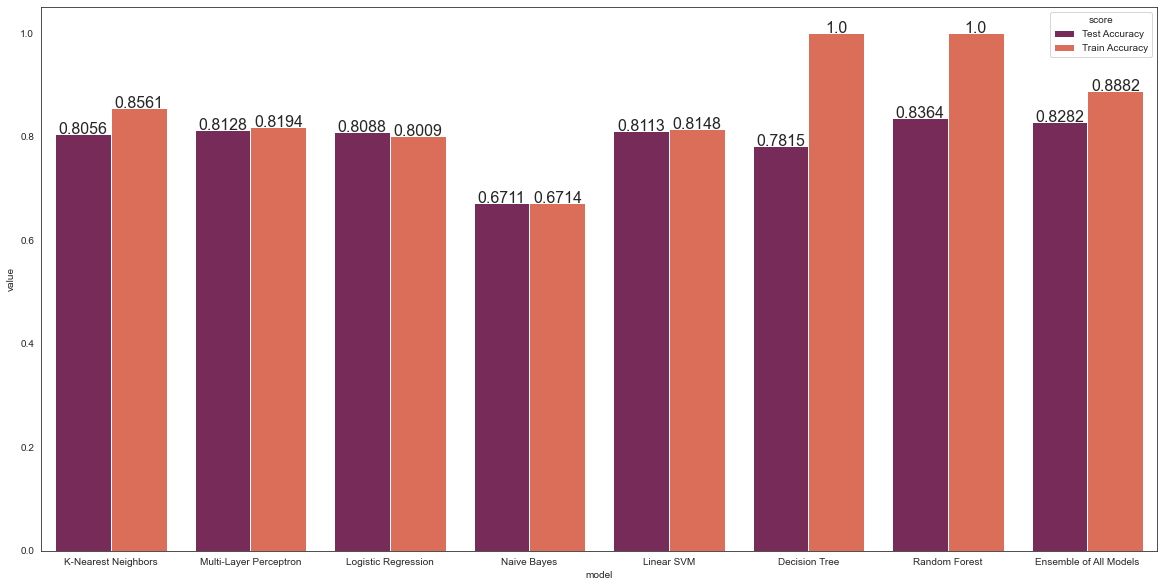

In [ ]:
%matplotlib inline
sns.set_style('white')
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
b=sns.barplot(data=scores, ax=ax, x='model', y='value',
                hue='score', palette='rocket')  

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value =round(p.get_height(), 4)
    ax.text(_x, _y, value, ha="center",fontsize=16) 